In [16]:
import pickle as pk
import seaborn as sb
import pandas as pd

with open(r'df.pkl', 'rb') as f:
    df1 = pk.load(f)

with open(r'../gs__reg_weights/df.pkl', 'rb') as f:
    df2 = pk.load(f)

df = pd.concat([df1, df2], ignore_index=True)

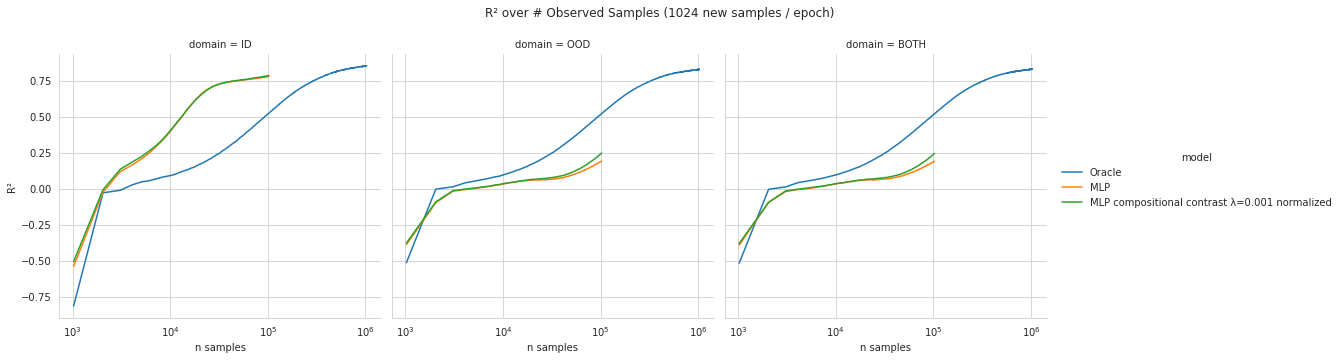

In [18]:
sb.set_style('whitegrid')
data=df.loc[(df['model'].isin(['MLP', 'MLP compositional contrast λ=0.001 normalized', 'Oracle']))
    & (df['metric'] == 'test R²')
    & (df['l'] == 8)]
fg = sb.relplot(data=data, x='n samples', y='val', hue='model', col='domain', kind='line')
fg.set(xscale='log')
fg.set_ylabels('R²')
fg.fig.suptitle('R² over # Observed Samples (1024 new samples / epoch)')
fg.fig.subplots_adjust(top=0.85)